<font size="5"> Solution to 1(a) </font> 

In [2]:
# Asked to run this for answering 1(a), provided for by the problem set

import util
import numpy as np


def calc_grad(X, Y, theta):
    """Compute the gradient of the loss with respect to theta."""
    m, n = X.shape

    margins = Y * X.dot(theta)
    probs = 1. / (1 + np.exp(margins))
    grad = -(1./m) * (X.T.dot(probs * Y))

    return grad


def logistic_regression(X, Y):
    """Train a logistic regression model."""
    m, n = X.shape
    theta = np.zeros(n)
    learning_rate = 10

    i = 0
    while True:
        i += 1
        prev_theta = theta
        grad = calc_grad(X, Y, theta)
        theta = theta - learning_rate * grad
        if i % 10000 == 0:
            print('Finished %d iterations' % i)
        if np.linalg.norm(prev_theta - theta) < 1e-15:
            print('Converged in %d iterations' % i)
            break
    return

print('==== Training model on data set A ====')
Xa, Ya = util.load_csv('../data/ds1_a.csv', add_intercept=True)
logistic_regression(Xa, Ya)

print('\n==== Training model on data set B ====')
Xb, Yb = util.load_csv('../data/ds1_b.csv', add_intercept=True)
logistic_regression(Xb, Yb)

==== Training model on data set A ====
Finished 10000 iterations
Finished 20000 iterations
Finished 30000 iterations
Converged in 30387 iterations

==== Training model on data set B ====
Finished 10000 iterations
Finished 20000 iterations
Finished 30000 iterations
Finished 40000 iterations
Finished 50000 iterations
Finished 60000 iterations
Finished 70000 iterations
Finished 80000 iterations
Finished 90000 iterations
Finished 100000 iterations
Finished 110000 iterations


KeyboardInterrupt: 

<font size="5"> Solution to 1(a) continued</font>

In the above cell, we run the algorithm that is provided for in the problem set. It seems to converge quickly for dataset A but does not converge for dataset B.

<font size="5"> Solution to 1(b) </font>

Here we investigate why it converges for dataset A but not B, with the hint that it is not a numerical rounding or overflow/underflow error. The most obvious starting point is to see what the data actually looks like. See the cell below. 

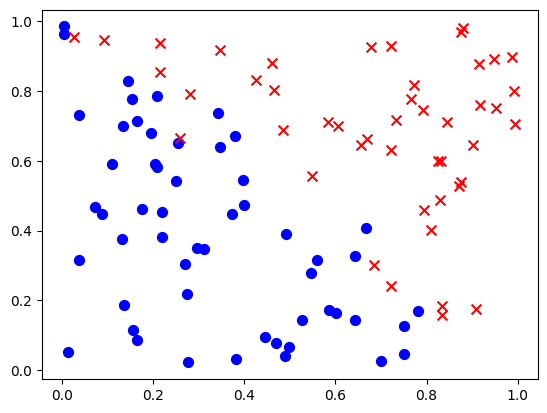

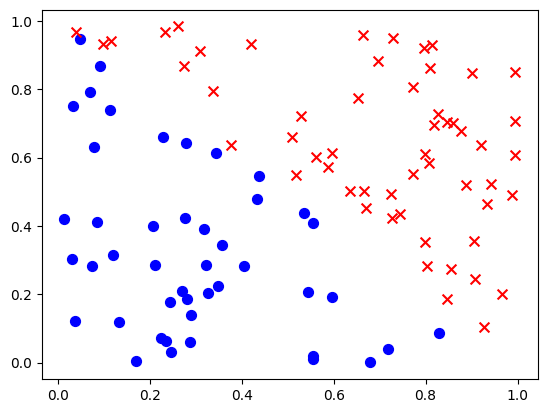

In [11]:
import matplotlib.pyplot as plt


def plot_data(X, Y, theta=None):
    # Define negative and  positive examples
    class_neg = X[Y == -1]
    class_pos = X[Y == 1]
    # Plot negative examples as blue circles and positive examples as red crosses
    plt.scatter(class_neg[:, 1], class_neg[:, 2], c='blue', marker='o', s=50)
    plt.scatter(class_pos[:, 1], class_pos[:, 2], c='red', marker='x', s=50)

    # Plot decision boundary if theta is supplied
    if theta is not None:
        x1 = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
        x2 = -(theta[0] + theta[1] * x1) / theta[2]
        plt.plot(x1, x2, c='black')
    plt.show()

Xa, Ya = util.load_csv('../data/ds1_a.csv', add_intercept=True)
Xb, Yb = util.load_csv('../data/ds1_b.csv', add_intercept=True)

plot_data(Xa, Ya)
plot_data(Xb, Yb)

<font size="5"> Solution to 1(b) continued </font>

At first glance it looks like the datasets don't look that different to each other, although there IS a key difference: dataset B is linearly separable but dataset A is not. This could be important, but now we will investigate further what is happening by looking closer at the update equation for theta: we'll print some values of theta, prev_theta and norm(theta-prev_theta).

In [19]:
import util
import numpy as np

glob_theta = np.array([0, 0, 0])

def calc_grad(X, Y, theta):
    """Compute the gradient of the loss with respect to theta."""
    m, n = X.shape

    margins = Y * X.dot(theta)
    probs = 1. / (1 + np.exp(margins))
    grad = -(1./m) * (X.T.dot(probs * Y))

    return grad


def logistic_regression(X, Y):
    """Train a logistic regression model."""
    m, n = X.shape
    theta = np.zeros(n)
    learning_rate = 10

    global glob_theta

    i = 0
    while True:
        i += 1
        prev_theta = theta
        grad = calc_grad(X, Y, theta)
        theta = theta - learning_rate * grad
        if i == 100000:
            print('Finished 100000 iterations')
            break
        if i % 10000 == 0:
            print('Finished %d iterations' % i)
            norm_diff = np.linalg.norm(prev_theta - theta)
            print(theta, prev_theta)
            print(f'Norm of previous theta - current theta: {norm_diff}')
        if np.linalg.norm(prev_theta - theta) < 1e-15:
            print('Converged in %d iterations' % i)
            break
        # plot current decision boundary every 1000 iterations
    return 

# print('==== Training model on data set A ====')
# Xa, Ya = util.load_csv('../data/ds1_a.csv', add_intercept=True)
# logistic_regression(Xa, Ya)

print('==== Training model on data set B ====')
Xb, Yb = util.load_csv('../data/ds1_b.csv', add_intercept=True)
logistic_regression(Xb, Yb)

==== Training model on data set B ====
Finished 10000 iterations
[-52.74109217  52.92982273  52.69691453] [-52.73915228  52.92788722  52.69496846]
Norm of previous theta - current theta: 0.003361039469518825
Finished 20000 iterations
[-68.10040977  68.26496086  68.09888223] [-68.09915565  68.26370792  68.0976252 ]
Norm of previous theta - current theta: 0.002173205351041188
Finished 30000 iterations
[-79.01759142  79.17745526  79.03755803] [-79.01663098  79.17649471  79.03659605]
Norm of previous theta - current theta: 0.0016644896054955345
Finished 40000 iterations
[-87.70771189  87.87276307  87.73897393] [-87.70692123  87.87197154  87.73818249]
Norm of previous theta - current theta: 0.00137040952812708
Finished 50000 iterations
[-95.01838735  95.1948202   95.0551918 ] [-95.01770902  95.1941405   95.05451311]
Norm of previous theta - current theta: 0.0011758957242939641
Finished 60000 iterations
[-101.37921493  101.57119731  101.41805781] [-101.37861703  101.57059769  101.41745983]
N

<font size="5"> Solution to 1(b) continued </font>

From the above, we see that norm(prev_theta - theta) is indeed descending, but it is doing so at a very slow pace. Also, something curious is happening: the coefficients of prev_theta and theta are "stable" in the sense that they both are always very nearly equal to each other, but they're always growing larger and larger. What this effectively does, is produce the same line each time (scaling theta by a constant does not change the decision boundary). We'll see pictures to demonstate this below.

==== Training model on data set B ====
Finished 10000 iterations
Finished 20000 iterations
Finished 30000 iterations
Finished 40000 iterations
Finished 50000 iterations


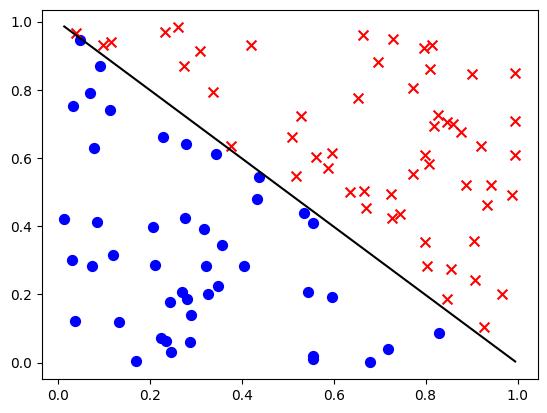

Finished 60000 iterations
Finished 70000 iterations
Finished 80000 iterations
Finished 90000 iterations
Finished 100000 iterations


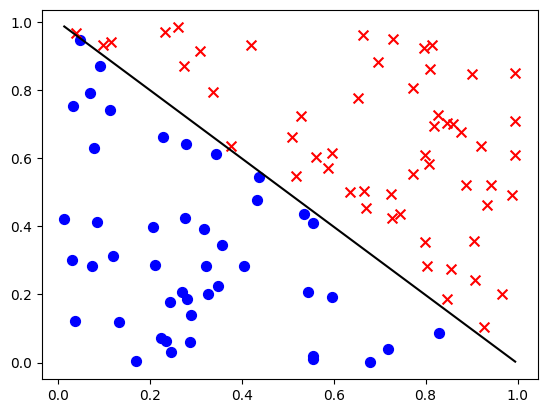

Finished 110000 iterations
Finished 120000 iterations
Finished 130000 iterations
Finished 140000 iterations
Finished 150000 iterations


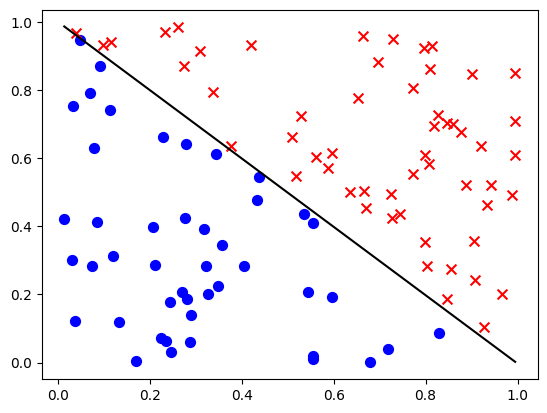

Finished 160000 iterations
Finished 170000 iterations
Finished 170000 iterations


In [18]:
import util
import numpy as np

glob_theta = np.array([0, 0, 0])

def calc_grad(X, Y, theta):
    """Compute the gradient of the loss with respect to theta."""
    m, n = X.shape

    margins = Y * X.dot(theta)
    probs = 1. / (1 + np.exp(margins))
    grad = -(1./m) * (X.T.dot(probs * Y))

    return grad


def logistic_regression(X, Y):
    """Train a logistic regression model."""
    m, n = X.shape
    theta = np.zeros(n)
    learning_rate = 10

    global glob_theta

    i = 0
    while True:
        i += 1
        prev_theta = theta
        grad = calc_grad(X, Y, theta)
        theta = theta - learning_rate * grad
        if i % 10000 == 0:
            print('Finished %d iterations' % i)
        if i == 170000:
            print('Finished 170000 iterations')
            break
        if np.linalg.norm(prev_theta - theta) < 1e-15:
            print('Converged in %d iterations' % i)
            break
        # plot current decision boundary every 1000 iterations
        if i % 50000 == 0:
            plot_data(X, Y, theta)
    return 

# print('==== Training model on data set A ====')
# Xa, Ya = util.load_csv('../data/ds1_a.csv', add_intercept=True)
# logistic_regression(Xa, Ya)

print('==== Training model on data set B ====')
Xb, Yb = util.load_csv('../data/ds1_b.csv', add_intercept=True)
logistic_regression(Xb, Yb)




<font size="5"> Solution to 1(b) continued </font>

The above visually explains the previous finding. Even though theta is getting larger, its entries are in the same proportion roughly. In other words, the coefficients governing the line/hyperplane are effectively being multiplied by a constant, causing the line to remain the same even though the coefficients are ballooning. 

The question is, why is this happening to dataset B but not dataset A? 

Suppose that the data is linearly separable. We'll work with two dimensions for simplicity (and this is the number of dimensions in this problem). Then we can assume without loss of generality that $x_1 > 0$ for all positive examples and $x_1 < 0$ for all negative examples, like in the graph below.

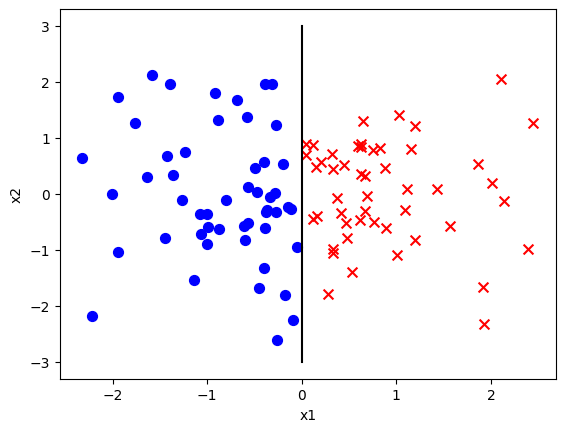

In [51]:
# Generate a graph with two classes, and the separating line is the line x1 = 0
import numpy as np
import matplotlib.pyplot as plt

# Generate data
X = np.random.randn(100, 2)
Y = np.array([1 if x[0] > 0 else -1 for x in X])

# Plot data again but use blue dots and red crosses instead
plt.scatter(X[Y == -1, 0], X[Y == -1, 1], c='blue', marker='o', s=50)
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], c='red', marker='x', s=50)

# Draw decision boundary, black vertical line in the middle
plt.plot([0, 0], [-3, 3], c='black')

# Title the axes
plt.xlabel('x1')
plt.ylabel('x2')

# Show the plot
plt.show()

<font size="5"> Solution to 1(b) continued </font>

We can make this assumption because we can always rotate and translate the data to make this true.

Now a perfectly good separating line is $\theta = \begin{bmatrix} 0 \\ k \\ 0 \end{bmatrix}$ where $k$ is a constant.

The loss function for logistic regression is: $\ell (\theta) = -\frac{1}{m}\sum_{i=1}^m y^{(i)}\log(h_\theta(x^{(i)}) + (1-y^{(i)})\log(1-h_\theta(x^{(i)}))$ where $h_\theta(x) = \frac{1}{1+e^{-\theta^Tx}}$. The goal of logistic regression is to find a $\theta$ which maximises the loss function.

From the above graph, we see that when $y^{(i)} = 1$, $x_1>0$ and when $y^{(i)} = 0$, $x_1 < 0$. This means that $\theta^T x = kx_1$ and $h_\theta(x) = \frac{1}{1+e^{-kx_1}}$.

What happens if we choose larger and larger values of $k$? Then $h_\theta(x) \rightarrow 1$ for positive examples and $h_\theta(x) \rightarrow 0$ for negative examples. So the log terms in the loss function will converge towards $\log 1$ which means the loss function gets smaller as k gets larger. But k getting larger doesn't change the decision boundary. This is why we don't have convergence for dataset B: because we're just arbitrarily choosing larger and larger $\theta$ in order to minimise the loss function in a "cheating" kind of way. 

It's important to see that this does not happen when the data is not linearly separable. This is because now, we have four situations:

CASE 1:
$x_1 > 0$ and $y^{(i)} = 1$ 
CASE 2:
$x_1 > 0$ and $y^{(i)} = 0$
CASE 3:
$x_1 < 0$ and $y^{(i)} = 1$
CASE 4:
$x_1 < 0$ and $y^{(i)} = 0$

When $x_1 < 0$ and $y^{(i)} = 1$, the log term for that drives the loss function to $- \infty$, and similarly for the log term when $x_1 > 0$ and $y^{(i)} = 0$. So we can't just arbitrarily choose larger and larger values of $k$ to minimise the loss function anymore, which is why the separable assumption is necessary for the "$\theta$ growing larger" behaviour to occur. 


<font size="5"> Solution to 1(c) </font>

(i) Playing with different learning rates with code, using a constant learning rate doesn't seem to be effective. While norm(prev_theta - theta) does decrease, it does so very slowly, while the entries of theta balloons.

(ii) Using a decreasing learning rate seems to be effective. With initial learning_rate set to 10 and adding the line "learning_rate *= 1 / (i ** 2)" where i is the number of iterations, had convergence on both datasets A and B, although the accuracy of the line seemed to suffer. See the below output.

==== Training model on data set A ====
Converged in 12 iterations


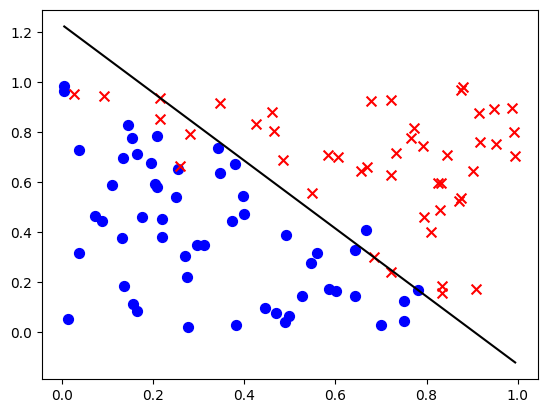

==== Training model on data set B ====
Converged in 12 iterations


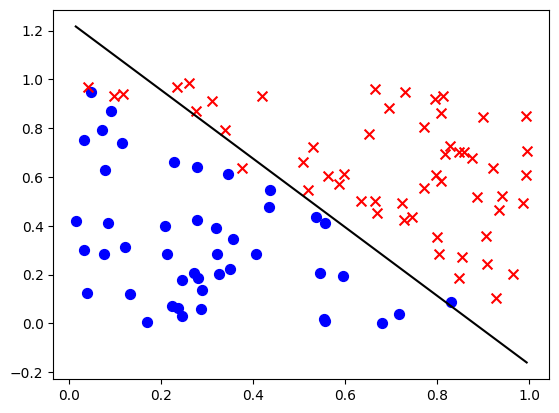

In [78]:
import util
import numpy as np

glob_theta = np.array([0, 0, 0])

def calc_grad(X, Y, theta):
    """Compute the gradient of the loss with respect to theta."""
    m, n = X.shape

    margins = Y * X.dot(theta)
    probs = 1. / (1 + np.exp(margins))
    grad = -(1./m) * (X.T.dot(probs * Y))

    return grad


def logistic_regression(X, Y):
    """Train a logistic regression model."""
    m, n = X.shape
    theta = np.zeros(n)
    learning_rate = 10

    global glob_theta

    i = 0
    while True:
        i += 1
        prev_theta = theta
        grad = calc_grad(X, Y, theta)
        theta = theta - learning_rate * grad
        if i % 10000 == 0:
            print('Finished %d iterations' % i)
            print(theta, prev_theta, np.linalg.norm(prev_theta - theta))
        if np.linalg.norm(prev_theta - theta) < 1e-15:
            print('Converged in %d iterations' % i)
            # plot decision boundary
            plot_data(X, Y, theta)
            break
        # vary the learning rate with the relation 1/t^2
        learning_rate = learning_rate * 1 / (i ** 2)
        
        
    return 

# print('==== Training model on data set A ====')
# Xa, Ya = util.load_csv('../data/ds1_a.csv', add_intercept=True)
# logistic_regression(Xa, Ya)

print('==== Training model on data set A ====')
Xa, Ya = util.load_csv('../data/ds1_a.csv', add_intercept=True)
logistic_regression(Xa, Ya)

print('==== Training model on data set B ====')
Xb, Yb = util.load_csv('../data/ds1_b.csv', add_intercept=True)
logistic_regression(Xb, Yb)





<font size="5"> Solution to 1(c) continued </font>

(iii) Scaling the data shouldn't affect the convergence. It's clear from the datasets, but also from the graphs, that the data is already between 0 and 1.2 on both axes.

(iv) Adding a regularisation term to the loss function would definitely help: the point of adding the regularisation term to the loss function is to penalise large values of $\theta$, which directly tackles the ballooning issue.

(v) Adding noise to the data could also help, because then the data can become linearly inseparable, which avoids the ballooning issue.

<font size="5"> Solution to 1(d) </font>

The hinge loss function is: $\ell (\theta) = \frac{1}{m}\sum_{i=1}^m \max(0, 1-y^{(i)}\theta^Tx^{(i)})$.

The hinge loss function is defined as $\ell (w^Tx^{(i)}+b) = \max (0, 1-y^{(i)}(w^Tx^{(i)}+b))$.

In the linear separable case, $w^Tx^{(i)}+b > 0$ for positive examples and $w^Tx^{(i)}+b < 0$ for negative examples, so $y^{(i)}(w^Tx^{(i)}+b) > 0$ for all examples. Increasing $w, b$ endlessly does not minimise the loss function further, because once $1-y^{(i)}(w^Tx^{(i)}+b)$ becomes negative, the loss function just outputs 0 (due to taking the max).


